# 딥러닝

## 정확도를 더 높이기 위해서

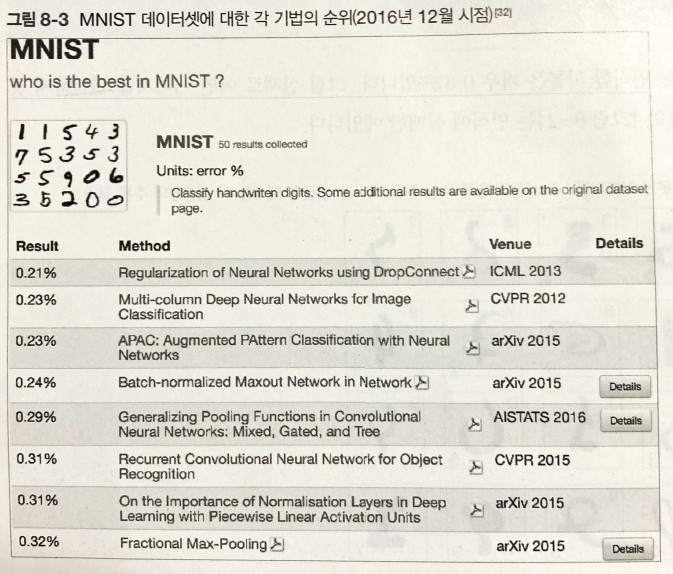

위의 사진 <What is the class of this image?>의 MNIST 데이터셋에 대한 각 기법의 순위다. (2016년 12월 기준)

대체로 'Nueral Networks'나 'Deep', 'Convolutional'라는 키워드가 많음.
책에 따르면, 이 층들이 깊지는 않았다고 한다.

### 그럼 어떻게 정확도를 높혔을까?

층을 높이는 방법 외에도 성능을 올리는 여러 기법이 있다.

- 앙상블 학습
- 학습률 감소
- 데이터 확장

특히 데이터 확장 (Data Augmentation)은 다양한 방법을 통해 적은 데이터로도 큰 학습 효과를 보여준다.

대표적인 방법은 아래와 같다.

- 회전
- 이동
- Crop
- Flip
- 스케일 변화

### 'Deep'의 중요성

그럼에도 불구하고 층을 깊게하는 이유는 무엇일까?

책에 따르면 그 이유에 대한 명확한 근거가 아직부족하지만, 경험적 근거로서 아래와 같은 이유가 있다고 한다.

#### 딥러닝의 트랜드

ILSVRC라는 이미지 인식 대회에서의 결과보면, 상위를 차지한 모델이 대부분 아래와 같은 공통점을 가진다.

- 딥러닝 기반
- 더 깊게 만드는 추세

이를 통해 층의 깊에 비례해 정확도가 좋아지는 것을 알 수 있다.

#### 매개변수 개수 감소

심층 신경망은 단층 신경망 모델보다 매개변수가 적고 단순한 구조를 가진다고 한다.

아래의 예시를 보면 5x5 Conv 1개를 사용할 경우 매개변수가 25(5\*5)개 필요하지만, 3x3 Conv를 2개 사용하면 총 18개 (2\*3\*3)의 매개변수를 가진다.

매개변수가 적다는 것은 곧 속도 향상과 연결된다.

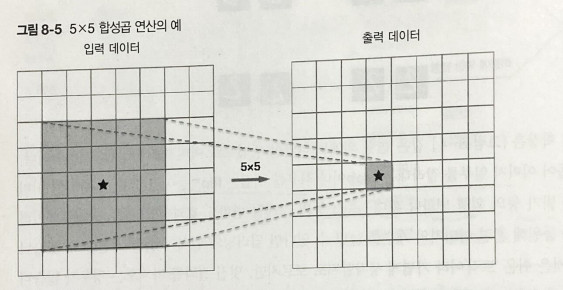

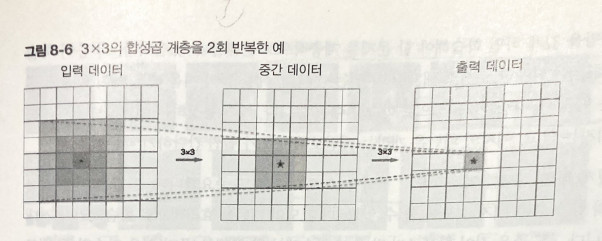

또한 이것 수용 역역(receptive field)에도 긍정적인 영향을 준다.
이것은 작은 필터를 겹쳐 신경망을 깊게 할 때의 장점이라고 볼 수 있는데, 중간에 활성화 함수를 끼워 넣음으로서 더 같은 작업을 하지만 더 표현력이 좋은 모델을 구성할 수 있다.

#### 학습의 효율성 증가

위에서 언급한 속도가 개선되어 고속으로 수행할 수 있다는 것도 하나의 장점이고, 결과적으로 이렇게 나눔으로서 큰 문제를 작은 문제로 나누어 해결 할 수 있다는 것도 층을 깊게하는 것의 중요한 장점중 하나이다.

## 딥러닝 초기 역사

딥러닝이 지금처럼 큰 주목을 받게 된 계기는 2012년에 진행된 ILSVRC에서 **AlexNet**이 압도적인 성능으로 우승하면서부터였다.

이 대회에서 우승한 모델 3개를 간단히 살펴보자.

### VGG

기본적인 CNN으로 Conv계층과 Pooling 계층으로 구성된다.
각 계층이 점점 커널 크기를 줄이며 나아가다 Full connected layer를 붙여서 마무리한다.

여기서 주목할점은 필터 크기가 모두 3x3이라는 점이다.
이어서 2~4회 pooling을 연속으로 진행하여 크기를 절반으로 줄이는 것을 반복한다.

1등인 GoogLeNet보다 성능은 조금 부족했지만, 구성이 간단하여 응용하기 좋다는 장점이 있다.

![](https://wikidocs.net/images/page/164796/vgg_Fig_01.png)

### GoogLeNet

앞의 vgg와 다르게 세로 뿐만 아니라 가로 방향으로 깊이가 깊다는 것이 특징이다. 

![](https://oi.readthedocs.io/en/latest/_images/googlenet.png)

이를 인셉션 구조라고하는데 이는 크기가 다른 필터와 풀링을 여러개 적용하여 결과를 결합하는 역할을 수행한다.

또한 GoogLeNet에서는 1x1 필터를 다양한 곳에서 사용한다는 특징이 있다. 이는 채널쪽으로 크기를 줄이는 것으로, 매개변수를 제거하여 고석 처리에 기여한다는 장점이 있다.

![](https://oi.readthedocs.io/en/latest/_images/inception_module_naive_and_optimized.png)

### ResNet

ResNet은 Residual Network의 약자이며, 구글의 경쟁사 MS의 작품이다.

층을 깊게하는 것은 성능향상에 큰 기여를 한다고 하지만, 이는 항상 그런것 많은 아니다. 층이 지나치게 깊으면 가중치 소실과 같은 이슈로 인해서 학습이 오히려 잘 안되는 문제가 발생한다.

이를 해결하기 위해 그들은 Skip connection을 도입해서 성능이 깊이에 대해 비례적으로 상승할 수 있도록 하였다.

![](https://programmathically.com/wp-content/uploads/2022/01/Screenshot-2022-01-30-at-08.57.06-1024x544.png)

Skip connection이란 아래와 같이 입력 데이터를 합성곱 계층을 건너뛰어 (skip) 출력에 더하는 구조를 의미한다. 

이는 역전파 과정에서 신호 감쇠를 막아준다.

또한 위층의 기울기를 그대로 전달하기 때문에, 위층의 의미있는 기울기가 전될된다고 기대할 수 있다.

ResNet에서는 2개 층마다 건너뛰면서 층을 깊게하며, 150층 이상으로 구성해도 정확도가 오르는 것을 알 수 있다.

![](https://gaussian37.github.io/assets/img/dl/concept/resnet/1.png)

## 딥러닝 고속화

빅데이터와 네트워크의 발전으로 딥러닝에서는 대량의 연산을 수행해야한다. 

우리는 이를 효율적으로 학습하기위해 여러 고속화 방법을 고려할 수 있다.

### GPU

GPU는 이름 그대로 그래픽관련 연산을 수행하는 것이 주 역할이었으나 최근에는 **범용 수치 연산**에도 활용되며 딥러닝의 고속화에 큰 기여를 하였다.

딥러닝에서는 대량의 단일 곱셈, 누산 또는 큰 행렬의 내적을 수행해야한다. 이러한 대량 벙렬 연산은 GPU의 특기라고 할 수 있다.

NVIDIA에서는 이러한 GPU 컴퓨팅을 위한 라이브러리인 CUDA를 제공하고 있으며, cuDNN을 통해 CUDA위에서 사용가능한 여러 함수들이 구현되어 있다.

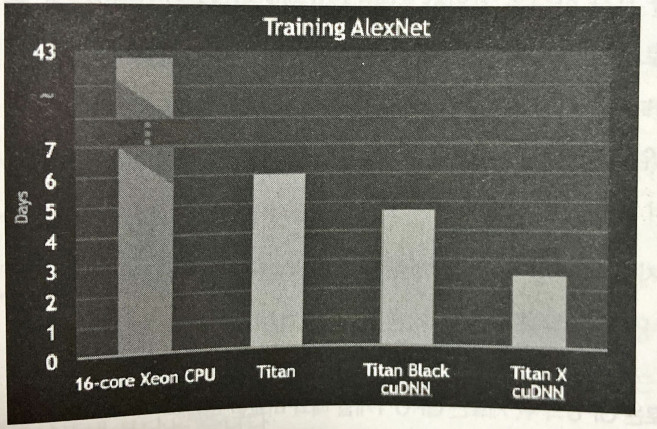

### 분산학습

좋은 GPU를 사용해 딥러닝 성능을 수직적으로 향상시키는 것도 좋지만, 여러 하드웨어를 통한 수평 확장도 하나의 좋은 방법이다.

다수의 GPU나 컴퓨터를 이용해서 분산학습을 사용하면, 거대한 데이터센터 수준의 빅데이터를 저지연/고처리량 네트워크 위에서 좋은 성과를 발휘할 수 있다.

### 연산 정밀도와 비트 줄이기

계산 능력 외에도 메모리 용량과 버스 대역폭등은 딥러닝 고속화에 큰 병목을 유발한다.

메모리 용량 측면에서는 대량의 가중치 매게변수와 중간 데이터를 메모리에 저장해야함에 따라 발생하몀, 버스 대역폭 측면에서는 GPU의 버스를 흐르는 데이터가 많이져 한계를 넘어서면 병목이 발생한다.

이를 해결하기 위해서 데이터의 비트 수를 최소화시켜주는 것이 바람직하다.

보통 컴퓨터에서는 정밀도를 높이기 위해 64비트 또는 32비트 부동소수점 수를 사용해서 실수를 표현하지만, 딥러닝에서는 그렇게 높은 수치 정밀도를 요구하지 않는다.

따라서 16비트 수준으로 정밀도를 퇴화시키는 것도 하나의 좋은 방법이다.

## 딥러닝의 활용

### 사물 검출 (Object Detection)

R-CNN
Fast R-CNN
Faster R-CNN

![](https://production-media.paperswithcode.com/methods/new_splash-method_NaA95zW.jpg)

### 분할 (Image Segmentation)

FCN

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdab59q%2Fbtq0tfkffFq%2Fk4GD8TKLusWjfVq36DMBn0%2Fimg.png)

### 사진 캡션 생성

NIC (Neural Image Caption)

![](https://velog.velcdn.com/images%2Fa01152a%2Fpost%2Fc2d815ef-7906-42df-a631-7a5c70e63433%2Fimage.png)

이 모델에서 사진과 자연어를 조합하고 처리하는 것과 같이 여러 정보를 조합하고 처리하는 일이 많은데 이는 멀티모달 처리 (Multimodal processing) 이라고 한다.

## 딥러닝의 미래

### 이미지 스타일 변환

![](https://user-images.githubusercontent.com/47182864/74012393-7e0b1400-49cd-11ea-8ec9-df4754cefddb.png)

### 이미지 생성

DCGAN

![](https://editor.analyticsvidhya.com/uploads/754471a.png)

### 자율 주행

SegNet

![](http://global-autonews.com/data/file/bd_034/1188217601_ztfUNWE0_1.JPG)

### 강화학습

Deep Q-Network

![](https://blog.kakaocdn.net/dn/d4gy36/btrDWT2fiGK/MKGnWp5kEEkEj4kBsed3O1/img.jpg)
